# 零、資料與模組引入


In [206]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import stats
import scipy.stats as st
import statistics
from scipy.stats.mstats import kruskalwallis
from scipy.stats import normaltest

dat = pd.read_csv("./data/maininfo-listings.csv")
data = dat.drop(columns=['listing_url','picture_url','host_url','host_thumbnail_url','host_picture_url']) #1 8 10 12 19 20
data.info()
data.duplicated().sum()#No duplicated data
data.head(2)
#data.iloc[40,]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5936 non-null   int64  
 1   scrape_id                                     5936 non-null   int64  
 2   last_scraped                                  5936 non-null   object 
 3   source                                        5936 non-null   object 
 4   name                                          5936 non-null   object 
 5   description                                   5830 non-null   object 
 6   neighborhood_overview                         1898 non-null   object 
 7   host_id                                       5936 non-null   int64  
 8   host_name                                     5936 non-null   object 
 9   host_since                                    5936 non-null   o

,id,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,20230324234127,2023-03-25,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.46
1,72571,20230324234127,2023-03-25,city scrape,SoHo off Hollywood Road 3A,This apartment is located in a traditional Hon...,NaN,304876,Brend,2010-11-30,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.03


# 一、資料預處理


## 1. 處理遺失值

資料清理部分
1. scrape_id 刪
2. last_scraped 刪
3. source 應該可刪
4. 名字 需要修
5. 描述 --> 可以做文字探勘
6. neighborhood_overview --> 可以做文字探勘
7. host id
8. host_name
9.  host_since
10. host_location --> 應該可刪
11. host自介  --> 可以做文字探勘
12. 回覆時間
13. 回覆率
14. host_acceptance_rate
15. host_is_superhost
16. host_neighbourhood
17. host_listings_count --> 應該可刪
18. host_total_listings_count --> 應該可刪
19. host_verifications 計算各認證的數量
20. host_has_profile_pic (tf)
21. host_identity_verified
22. neighbourhood ==> 地點統一
23. neighbourhood_cleansed 感覺是22的整理版
24. 空 刪
25. 緯度
26. 經度
27. property_type==> 感覺也需要再整理
28. room_type
29. accommodates : The maximum capacity of the listing
30. 空 刪
31. bathrooms_text ==> 文字與數字作分析
32. bedrooms 數量
33. beds 數量
34. amenities 字串處理
35. price 重要!!
36. minimum_nights
37. maximum_nights
38. minimum_minimum_nights
39. maximum_minimum_nights
40. minimum_maximum_nights
41. maximum_maximum_nights
42. minimum_nights_avg_ntm
43. maximum_nights_avg_ntm
44. calendar_updated
45. has_availability ==> 可刪
46. availability_30 ==> 可刪
47. availability_60 ==> 可刪
48. availability_90 ==> 可刪
49. availability_365 ==> 可刪
50. calendar_last_scraped ==> 可刪
51. number_of_reviews
52. number_of_reviews_ltm
53. number_of_reviews_l30d
54. first_review
55. last_review
56. review_scores_rating
57. review_scores_accuracy
58. review_scores_cleanliness
59. review_scores_checkin
60. review_scores_communication
61. review_scores_location
62. review_scores_value
63. license
64. instant_bookable
65. calculated_host_listings_count
66. calculated_host_listings_count_entire_homes
67. calculated_host_listings_count_private_rooms
68. calculated_host_listings_count_shared_rooms
69. reviews_per_month

In [207]:
#顯示遺失值數量
for i in range(0,len(data.columns)):
    print(i,':',data.iloc[:,i].isnull().sum(),data.columns[i])
    
#df.isnull().sum()

0 : 0 id
1 : 0 scrape_id
2 : 0 last_scraped
3 : 0 source
4 : 0 name
5 : 106 description
6 : 4038 neighborhood_overview
7 : 0 host_id
8 : 0 host_name
9 : 0 host_since
10 : 1757 host_location
11 : 2002 host_about
12 : 516 host_response_time
13 : 516 host_response_rate
14 : 504 host_acceptance_rate
15 : 1 host_is_superhost
16 : 457 host_neighbourhood
17 : 0 host_listings_count
18 : 0 host_total_listings_count
19 : 0 host_verifications
20 : 0 host_has_profile_pic
21 : 0 host_identity_verified
22 : 4038 neighbourhood
23 : 0 neighbourhood_cleansed
24 : 5936 neighbourhood_group_cleansed
25 : 0 latitude
26 : 0 longitude
27 : 0 property_type
28 : 0 room_type
29 : 0 accommodates
30 : 5936 bathrooms
31 : 19 bathrooms_text
32 : 1051 bedrooms
33 : 98 beds
34 : 0 amenities
35 : 0 price
36 : 0 minimum_nights
37 : 0 maximum_nights
38 : 1 minimum_minimum_nights
39 : 1 maximum_minimum_nights
40 : 1 minimum_maximum_nights
41 : 1 maximum_maximum_nights
42 : 1 minimum_nights_avg_ntm
43 : 1 maximum_nights_a

reviews_per_month
0.02                 134
0.04                  90
1.00                  74
0.05                  65
0.03                  64
                    ... 
2.98                   1
2.97                   1
2.96                   1
2.95                   1
12.77                  1
Length: 351, dtype: int64


<AxesSubplot:ylabel='Count'>

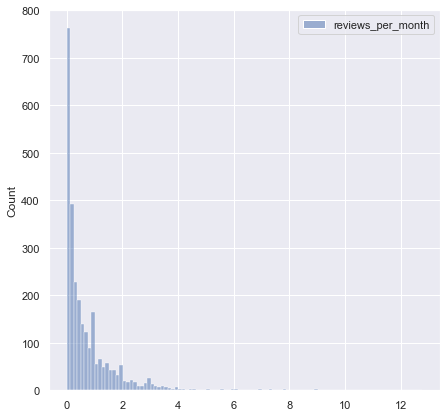

In [208]:
print(data.loc[:,['reviews_per_month']].value_counts())
sns.histplot(data.loc[:,['reviews_per_month']])

In [209]:
# delete useless columns or too many missing value.
df = data#.drop(data.columns[[1,2,6,10,11,22,24,30,32,44,54,55,56,57,58,59,60,61,62,63,69]],axis = 1)
df.head(2)

#檢視各變數有多少特徵值
#data.shape[1]
print(df.iloc[:,[23]].value_counts())

neighbourhood_cleansed
Yau Tsim Mong             2114
Wan Chai                  1278
Central & Western         1094
Islands                    324
Kowloon City               245
Eastern                    243
Sham Shui Po               163
Southern                   139
Sai Kung                    95
Yuen Long                   52
Sha Tin                     42
Tuen Mun                    36
Tai Po                      29
Kwun Tong                   28
Tsuen Wan                   21
Wong Tai Sin                16
North                       13
Kwai Tsing                   4
dtype: int64


In [210]:
#超過6筆遺失值，直接刪掉該筆資料
df = df.dropna(thresh=6)

#3 description :就當作沒有描述
df.iloc[:,3] = df.iloc[:,3].fillna(value=' ')

#7 host_response_time // 8 host_response_time // 9 host_acceptance_rate

#10 superhost ==> logit reg.

#23 bathrooms_text
import re
df.iloc[:,23] = df.iloc[:,23].str.split(' ').str.get(0)
df.iloc[:,23] = df.iloc[:,23].str.replace('Half-bath', '0.5')
df.iloc[:,23] = df.iloc[:,23].str.replace('Shared', '0.5')
df.iloc[:,23] = df.iloc[:,23].str.replace('Private', '0.5')


#24 KNN

#29 


for i in range(0,len(df.columns)):
    if df.iloc[:,i].isnull().sum() != 0:
        print(i,':',df.iloc[:,i].isnull().sum(),df.columns[i])


print(df.iloc[:,[23]].value_counts())

5 : 106 description
6 : 4038 neighborhood_overview
10 : 1757 host_location
11 : 2002 host_about
12 : 516 host_response_time
13 : 516 host_response_rate
14 : 504 host_acceptance_rate
15 : 1 host_is_superhost
16 : 457 host_neighbourhood
22 : 4038 neighbourhood
24 : 5936 neighbourhood_group_cleansed
30 : 5936 bathrooms
31 : 19 bathrooms_text
32 : 1051 bedrooms
33 : 98 beds
38 : 1 minimum_minimum_nights
39 : 1 maximum_minimum_nights
40 : 1 minimum_maximum_nights
41 : 1 maximum_maximum_nights
42 : 1 minimum_nights_avg_ntm
43 : 1 maximum_nights_avg_ntm
44 : 5936 calendar_updated
54 : 3206 first_review
55 : 3206 last_review
56 : 3206 review_scores_rating
57 : 3239 review_scores_accuracy
58 : 3239 review_scores_cleanliness
59 : 3239 review_scores_checkin
60 : 3241 review_scores_communication
61 : 3239 review_scores_location
62 : 3239 review_scores_value
63 : 5936 license
69 : 3206 reviews_per_month
neighbourhood_cleansed
Yau                       2114
Wan                       1278
Central    

## 2.篩選變數與檢視各變數分布

In [211]:
df.head(2)

,id,scrape_id,last_scraped,source,name,description,neighborhood_overview,host_id,host_name,host_since,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,20230324234127,2023-03-25,previous scrape,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,69063,Candace,2010-01-09,...,4.93,4.90,4.66,NaN,f,1,1,0,0,0.46
1,72571,20230324234127,2023-03-25,city scrape,SoHo off Hollywood Road 3A,This apartment is located in a traditional Hon...,NaN,304876,Brend,2010-11-30,...,4.51,4.73,4.13,NaN,f,10,6,4,0,1.03


In [212]:
for i in range(0,len(df.columns)):
    print(i,':',df.iloc[:,i].isnull().sum(),data.columns[i])

0 : 0 id
1 : 0 scrape_id
2 : 0 last_scraped
3 : 0 source
4 : 0 name
5 : 106 description
6 : 4038 neighborhood_overview
7 : 0 host_id
8 : 0 host_name
9 : 0 host_since
10 : 1757 host_location
11 : 2002 host_about
12 : 516 host_response_time
13 : 516 host_response_rate
14 : 504 host_acceptance_rate
15 : 1 host_is_superhost
16 : 457 host_neighbourhood
17 : 0 host_listings_count
18 : 0 host_total_listings_count
19 : 0 host_verifications
20 : 0 host_has_profile_pic
21 : 0 host_identity_verified
22 : 4038 neighbourhood
23 : 0 neighbourhood_cleansed
24 : 5936 neighbourhood_group_cleansed
25 : 0 latitude
26 : 0 longitude
27 : 0 property_type
28 : 0 room_type
29 : 0 accommodates
30 : 5936 bathrooms
31 : 19 bathrooms_text
32 : 1051 bedrooms
33 : 98 beds
34 : 0 amenities
35 : 0 price
36 : 0 minimum_nights
37 : 0 maximum_nights
38 : 1 minimum_minimum_nights
39 : 1 maximum_minimum_nights
40 : 1 minimum_maximum_nights
41 : 1 maximum_maximum_nights
42 : 1 minimum_nights_avg_ntm
43 : 1 maximum_nights_a

In [213]:
# 篩選用得到的變數
df1 = df.iloc[:,[0,4,7,8,10,12,13,14,15,16,22,23,27,28,29,30,31,32,33,34,35,36,51,52,53,56]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5936 entries, 0 to 5935
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5936 non-null   int64  
 1   name                    5936 non-null   object 
 2   host_id                 5936 non-null   int64  
 3   host_name               5936 non-null   object 
 4   host_location           4179 non-null   object 
 5   host_response_time      5420 non-null   object 
 6   host_response_rate      5420 non-null   object 
 7   host_acceptance_rate    5432 non-null   object 
 8   host_is_superhost       5935 non-null   object 
 9   host_neighbourhood      5479 non-null   object 
 10  neighbourhood           1898 non-null   object 
 11  neighbourhood_cleansed  5936 non-null   object 
 12  property_type           5936 non-null   object 
 13  room_type               5936 non-null   object 
 14  accommodates            5936 non-null   

In [214]:
df1.iloc[:,4]

0                   Los Angeles, CA
1                         Hong Kong
2                         Hong Kong
3       Hong Kong Island, Hong Kong
4                         Hong Kong
                   ...             
5931                            NaN
5932                      Hong Kong
5933                            NaN
5934                            NaN
5935                            NaN
Name: host_location, Length: 5936, dtype: object

## 3.變數整理

### host_location
將在香港設為1，其他設為0

In [215]:
df1.iloc[:,4].value_counts()

Hong Kong                      3462
Kowloon, Hong Kong              289
Hong Kong Island, Hong Kong     146
New Territories, Hong Kong       67
London, United Kingdom           24
                               ... 
Bilbao, Spain                     1
Antwerp, Belgium                  1
Madrid, Spain                     1
Seoul, South Korea                1
Montreal, Canada                  1
Name: host_location, Length: 84, dtype: int64

In [216]:
df1.iloc[:,4] = df1.iloc[:,4].str.contains('Hong')
df1.iloc[:,4] = df1.iloc[:,4].fillna(value=False).replace({True: 1, False: 0})
df1.iloc[:,4].value_counts()
df1.iloc[:,4].isnull().sum()
#pd.get_dummies(df1['host_location'])

C:\Users\user\AppData\Local\Temp\ipykernel_23684\2611465128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,4] = df1.iloc[:,4].str.contains('Hong')
C:\Users\user\AppData\Local\Temp\ipykernel_23684\2611465128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,4] = df1.iloc[:,4].fillna(value=False).replace({True: 1, False: 0})


0

### host_response_time
label encoding

In [217]:
df1.iloc[:,5].value_counts()

within an hour        2477
within a few hours    2345
within a day           465
a few days or more     133
Name: host_response_time, dtype: int64

In [218]:
df1.iloc[:,5] = df1.iloc[:,5].fillna(value='a few days or more')
df1.iloc[:,5]=df1.iloc[:,5].map({'within an hour': 0, 'within a few hours': 1,'within a day':2,'a few days or more':3})

C:\Users\user\AppData\Local\Temp\ipykernel_23684\461927311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,5] = df1.iloc[:,5].fillna(value='a few days or more')
C:\Users\user\AppData\Local\Temp\ipykernel_23684\461927311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,5]=df1.iloc[:,5].map({'within an hour': 0, 'within a few hours': 1,'within a day':2,'a few days or more':3})


### host_response_rate
NA值設為0

In [219]:
df1.iloc[:,6] = df1.iloc[:,6].fillna(value='0%')

C:\Users\user\AppData\Local\Temp\ipykernel_23684\3910369493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,6] = df1.iloc[:,6].fillna(value='0%')


In [220]:
df1.iloc[:,6] = df1.iloc[:,6].str.replace('%','')
df1['host_response_rate'] = df1['host_response_rate'].astype(int)
df1.iloc[:,6].head()

C:\Users\user\AppData\Local\Temp\ipykernel_23684\723367152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,6] = df1.iloc[:,6].str.replace('%','')
C:\Users\user\AppData\Local\Temp\ipykernel_23684\723367152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_response_rate'] = df1['host_response_rate'].astype(int)


0     0
1    96
2    96
3     0
4    96
Name: host_response_rate, dtype: int32

### host_acceptance_rate

In [221]:
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace('%','')
df1['host_acceptance_rate'] = pd.to_numeric(df1['host_acceptance_rate'])

C:\Users\user\AppData\Local\Temp\ipykernel_23684\3509690089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace('%','')
C:\Users\user\AppData\Local\Temp\ipykernel_23684\3509690089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_acceptance_rate'] = pd.to_numeric(df1['host_acceptance_rate'])


### host_is_superhost
label encoding

In [222]:
df1['host_is_superhost']=df1['host_is_superhost'].map({'t':1,'f':0})

C:\Users\user\AppData\Local\Temp\ipykernel_23684\3789273160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['host_is_superhost']=df1['host_is_superhost'].map({'t':1,'f':0})


In [223]:
df1['host_is_superhost'].isnull().sum()
#delete data

1

### Price
delete'$'

In [224]:
df1['price'] = df1['price'].str.replace('$','')
df1['price'] = df1['price'].str.replace(',','')
df1['price'] = pd.to_numeric(df1['price'])


C:\Users\user\AppData\Local\Temp\ipykernel_23684\3422651767.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['price'] = df1['price'].str.replace('$','')
C:\Users\user\AppData\Local\Temp\ipykernel_23684\3422651767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'] = df1['price'].str.replace('$','')
C:\Users\user\AppData\Local\Temp\ipykernel_23684\3422651767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [225]:
df1[df1['price'] == 0]

,id,name,host_id,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating
3952,48001907,Hotel ICON,386960723,Ken,0,3,0,100.0,NaN,Tsim Sha Tsui,...,NaN,NaN,NaN,"[""Heated pool with poolside bar \u2014 outdoor...",0.0,1,6,2,0,3.83


### neighbourhood_cleansed
要想下用onehot是否適合 或是用什麼方法做分類這樣</P>
決定用Target Encoding!!只是把平均改成計數</P>
https://axk51013.medium.com/%E4%B8%8D%E8%A6%81%E5%86%8D%E5%81%9Aone-hot-encoding-b5126d3f8a63</P>
https://medium.com/@seikimaii_Huang/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-target-encoding-1b585d8ee8ab

Hong Kong, Hong Kong Island, Hong Kong            672
Hong Kong, Kowloon, Hong Kong                     611
Hong Kong, New Territories, Hong Kong             173
Kowloon, Hong Kong                                 41
Hong Kong, Hong Kong                               41
                                                 ... 
Hong Kong, Hong Kong, kowloon, Hong Kong            1
Hong Kong, Monkok, Hong Kong                        1
Midlevels , Hong Kong Island, Hong Kong             1
Tsim Sha Tsui District 尖沙咀, Kowloon, Hong Kong      1
Causeway bay, Hong Kong Island, Hong Kong           1
Name: neighbourhood, Length: 155, dtype: int64


<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

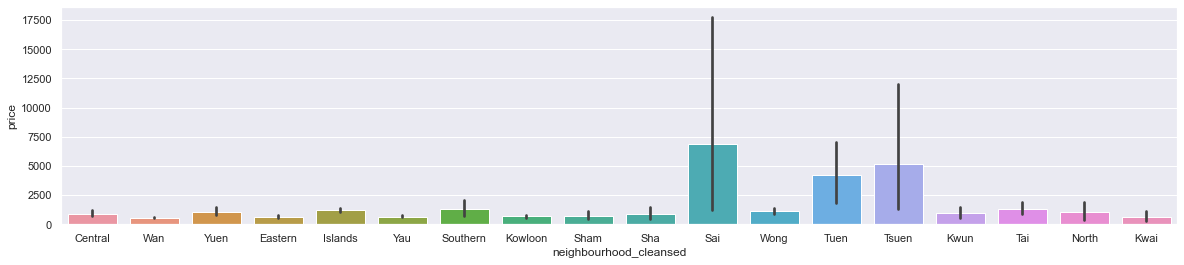

In [226]:
df1.iloc[:,10].isnull().sum()#0
print(df1.iloc[:,10].value_counts())
plt.figure(figsize=(20, 4))
sns.barplot(x = 'neighbourhood_cleansed', y = 'price', data = df1)
#df1.loc['nc_te']


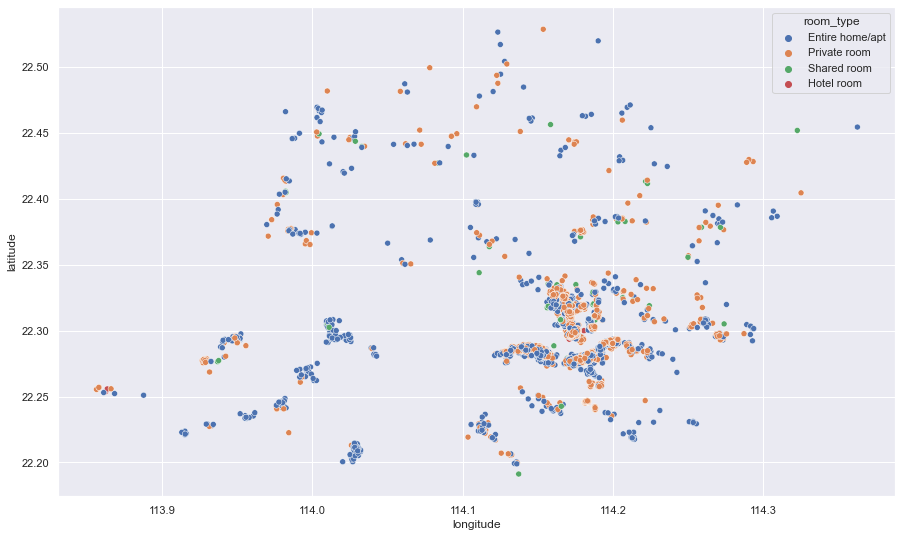

In [227]:
#先畫個圖看看 確定是地區ㄌ
plt.figure(figsize=(15,9))
map = sns.scatterplot(data = df,x='longitude',y='latitude',hue='room_type')#room_type   neighbourhood_cleansed
plt.ioff()

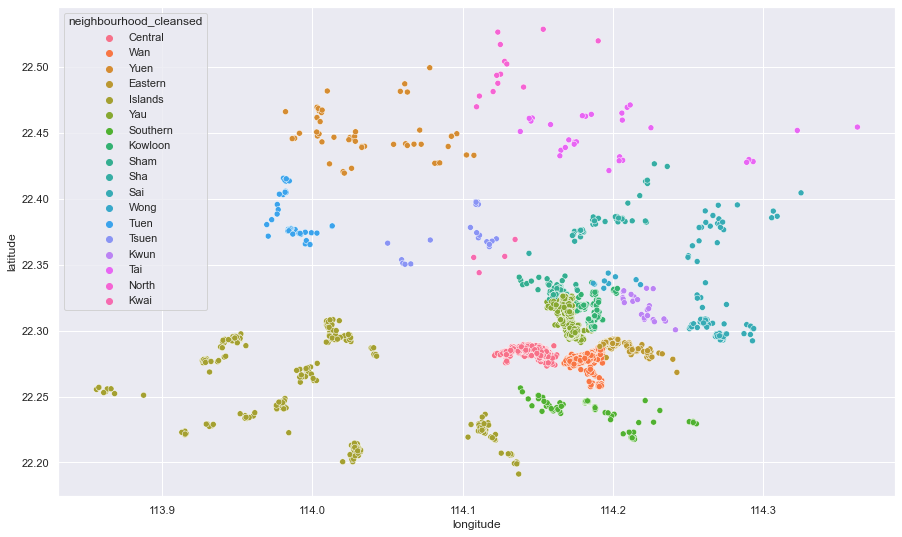

In [228]:
#先畫個圖看看 確定是地區ㄌ
plt.figure(figsize=(15,9))
map = sns.scatterplot(data = df,x='longitude',y='latitude',hue='neighbourhood_cleansed')#room_type   neighbourhood_cleansed
plt.ioff()

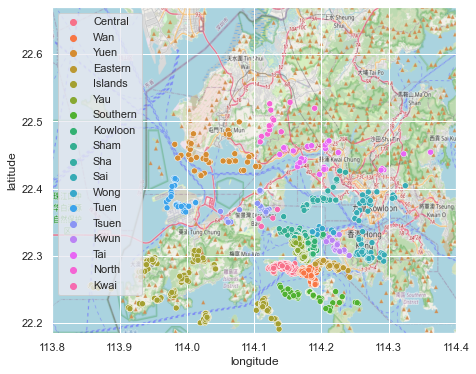

In [229]:
import urllib
#initializing the figure size
plt.figure(figsize=(15,6))
#loading the png NYC image found on Google and saving to my local folder along with the project
#i=urllib.request.urlopen('https://img-blog.csdnimg.cn/img_convert/c03dc9ed6c13dc554c5818d8717aaeef.png')
nyc_img=plt.imread('map.png')
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[113.8, 114.4, 22.185,22.67])
ax=plt.gca()
#using scatterplot again
sns.scatterplot(data = df,x='longitude',y='latitude',hue='neighbourhood_cleansed')#room_type   neighbourhood_cleansed
#df1.plot(kind='scatter', x='longitude', y='latitude', label='price', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

因為有些離群值太大，因此好像不太適合用Target Encoding

In [230]:
df1['nc_te'] = df1.groupby('neighbourhood_cleansed')['price'].transform('count')

C:\Users\user\AppData\Local\Temp\ipykernel_23684\2263419207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nc_te'] = df1.groupby('neighbourhood_cleansed')['price'].transform('count')


In [231]:
df1['nc_te']

0       1094
1       1094
2       1094
3       1094
4       1094
        ... 
5931    2114
5932      29
5933      36
5934    1094
5935    2114
Name: nc_te, Length: 5936, dtype: int64

### property_type
One-Hot

In [232]:
df1.iloc[:,11].isnull().sum()#0
print(df1.iloc[:,11].value_counts().head(30))
other_value = ['Houseb','Boat','Tiny h','Campsi','Pensio','Tent','Hut','Religi','Farm s','Dome','Barn']
df1.iloc[:,11] = df1.iloc[:,11].str[0:6].replace('Privat','Private').replace('Room i','Room').replace(other_value,'Other')

#plt.figure(figsize=(20, 4))
#sns.histplot(df1['property_type'],color = 'b')

Yau         2114
Wan         1278
Central     1094
Islands      324
Kowloon      245
Eastern      243
Sham         163
Southern     139
Sai           95
Yuen          52
Sha           42
Tuen          36
Tai           29
Kwun          28
Tsuen         21
Wong          16
North         13
Kwai           4
Name: neighbourhood_cleansed, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_23684\3205015703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[:,11] = df1.iloc[:,11].str[0:6].replace('Privat','Private').replace('Room i','Room').replace(other_value,'Other')


In [233]:
dummy = pd.get_dummies(df1.iloc[:,11])
df1 = df1.join(dummy)

### room_type
One Hot Encoding

Private room in rental unit    2434
Entire rental unit             1425
Entire condo                    367
Entire serviced apartment       228
Shared room in rental unit      222
                               ... 
Shared room in farm stay          1
Religious building                1
Hut                               1
Private room in boat              1
Private room in farm stay         1
Name: property_type, Length: 69, dtype: int64


<AxesSubplot:xlabel='room_type', ylabel='price'>

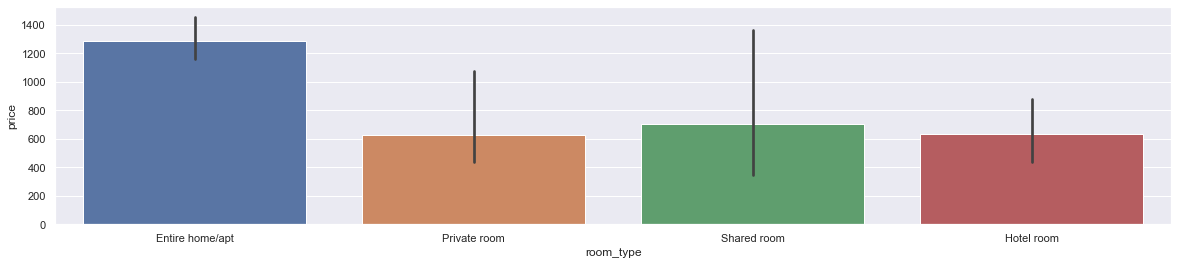

In [234]:
df1.iloc[:,12].isnull().sum()#0
print(df1.iloc[:,12].value_counts())
plt.figure(figsize=(20, 4))
sns.barplot(x = 'room_type', y = 'price', data = df1)


In [235]:
dummy = pd.get_dummies(df1.iloc[:,12])
df1 = df1.join(dummy)

### bathrooms_text

In [236]:
#df1.iloc[:,15].isnull().sum()#19
#print(df1.iloc[:,15].value_counts())

df1['bathrooms_text'] = df1['bathrooms_text'].str.replace(r'[a-z]','').str.replace(r'[A-Z]','').str.replace(' ','').str.replace('-','0.5')
df1['bathrooms_text'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_23684\3203056762.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['bathrooms_text'] = df1['bathrooms_text'].str.replace(r'[a-z]','').str.replace(r'[A-Z]','').str.replace(' ','').str.replace('-','0.5')


1      4930
2       478
1.5     270
3        76
4        41
0.5      35
0        29
2.5      24
3.5       8
8         7
5         7
6         4
10        3
4.5       2
9         1
6.5       1
5.5       1
Name: bathrooms_text, dtype: int64

### bedrooms
遺失值用0

In [237]:
df1['bedrooms'].isnull().sum()#1051
df1['bedrooms'] = df1['bedrooms'].fillna(value=0)
df1['bedrooms'].value_counts()


1.0     4002
0.0     1051
2.0      520
3.0      249
4.0       62
5.0       22
6.0       21
10.0       4
8.0        2
11.0       1
50.0       1
9.0        1
Name: bedrooms, dtype: int64

### beds
遺失值用KNN 或 直接放棄(直接這樣了)
1. 11
2. 12
3. 10
4. 74
5. 71
6. 19
7. 20

In [238]:
df1['beds'].isnull().sum()#98
df1['beds'].value_counts()

1.0     4179
2.0      976
3.0      311
4.0      178
5.0       61
8.0       42
6.0       41
7.0       17
9.0       11
10.0      10
16.0       5
11.0       3
14.0       1
15.0       1
12.0       1
50.0       1
Name: beds, dtype: int64

### amenities(NOT DONE)
One Hot Encoding</P>
正規處理\


In [239]:
#df1.iloc[:,18].isnull().sum()#0
#df1.iloc[:,18][2]#.str.replace(r'')
#df1["amenities"] = 
#df1.iloc[:,18] = df1.iloc[:,18].str.lower()#.replace('{','').replace('}','').replace('"','').replace(' ','_').split(',')
#mlb = MultiLabelBinarizer()
#final_df = df1.join(pd.DataFrame(mlb.fit_transform(df1.pop('amenities')),columns=mlb.classes_,index=df1.index))
#final_df.head()

#df1['amenities'] = df1['amenities'].map(lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\for amn in amns.split(",")]))


In [240]:
def get_val_from_list(row, column_name, value):
    ''' Fill in dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def split_list_into_columns(df, column_name, max_dummies_num = 30):
    ''' Split values in columns, which contain lists (for example, amenities) '''
    
    # get dictionary of unique values in lists across dataset rows
    values_dict = {}

    for unique_value in df[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
    # split into columns
    for value in values_sorted[: max_dummies_num]:
        df[column_name + '_' + value[0]] = df.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        

split_list_into_columns(df1, 'amenities')
df1 = df1.drop(columns = ['amenities'])

In [241]:
df1.iloc[:,30:34].head(5)

,Kwai,Kwun,North,Sai
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


### minimum_nights

In [242]:
df1['minimum_nights'].isnull().sum()#0
df1['minimum_nights'].value_counts()

1       1610
29      1226
30       945
28       535
2        369
3        238
31       193
7        138
5        121
60        86
14        62
4         51
10        50
90        40
6         33
180       29
20        25
27        25
365       24
15        18
182       16
25        16
26        10
21         9
100        7
300        7
22         7
8          4
39         3
32         3
120        3
150        2
9          2
88         2
19         2
18         2
11         2
13         2
61         2
1125       1
360        1
291        1
12         1
35         1
59         1
259        1
50         1
600        1
119        1
250        1
70         1
62         1
299        1
190        1
94         1
23         1
Name: minimum_nights, dtype: int64

### number_of_reviews_ltm
過去一年的瀏覽次數，可以當作Y</p>
但感覺也不太準 因為疫情

In [243]:
df1['number_of_reviews_ltm'].isnull().sum()#0
df1['number_of_reviews_ltm'].value_counts()

0     4314
1      465
2      286
3      174
4      114
      ... 
38       1
90       1
52       1
65       1
64       1
Name: number_of_reviews_ltm, Length: 61, dtype: int64

### review_scores_rating
太多遺失值 應該就放棄了

In [244]:
df1['review_scores_rating'].isnull().sum()

3206

### Final Step
delete missing data

In [245]:
df1.iloc[:,1:20].head()

,name,host_id,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price
0,Large Light Filled Loft,69063,Candace,0,3,0,NaN,0.0,Sheung Wan,"Hong Kong Island, Hong Kong",Centra,Entire rental unit,Entire home/apt,3,NaN,1,0.0,1.0,1400.0
1,SoHo off Hollywood Road 3A,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,NaN,Centra,Entire rental unit,Entire home/apt,2,NaN,1,0.0,1.0,369.0
2,Central Centre 5 min walk to/from Central MTR,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,NaN,Centra,Entire rental unit,Entire home/apt,6,NaN,1,2.0,3.0,1059.0
3,Entire Flat - Next to Man Mo Temple,544166,Celine,1,3,0,100.0,0.0,Mid-Levels,NaN,Centra,Entire rental unit,Entire home/apt,2,NaN,1.5,1.0,1.0,2391.0
4,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,"Hong Kong Island, Hong Kong",Centra,Entire rental unit,Entire home/apt,6,NaN,1,2.0,3.0,1097.0


In [246]:
#df1['room_type']
df2 = df1.copy()
delete = ['id','name','host_id','host_name','host_neighbourhood','neighbourhood','neighbourhood_cleansed','property_type','room_type','bathrooms','number_of_reviews_l30d','review_scores_rating']
for i in delete:
    df2.pop(i)

df2 = df2.dropna()

# 二、敘述性分析
目標：找到影響價格與點進去看的次數的重要變數</P>
馬賽克圖</P>


In [247]:
df1.head()

,id,name,host_id,host_name,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,amenities_ Microwave,amenities_ Private entrance,amenities_ Lock on bedroom door,amenities_ Self check-in,amenities_ Heating,amenities_ First aid kit,amenities_ Extra pillows and blankets,amenities_ Hot water kettle,amenities_ Shower gel,amenities_ Luggage dropoff allowed
0,17891,Large Light Filled Loft,69063,Candace,0,3,0,NaN,0.0,Sheung Wan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,72571,SoHo off Hollywood Road 3A,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,103760,Central Centre 5 min walk to/from Central MTR,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,104626,Entire Flat - Next to Man Mo Temple,544166,Celine,1,3,0,100.0,0.0,Mid-Levels,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,132773,Fabulous 2 Bdrm Aprt Open kitchen,304876,Brend,1,0,96,97.0,0.0,Sheung Wan,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## 相關性分析 檢視連續變數之間的差別

In [248]:
df3 = df1.copy()
delete2 = ['id','host_location','name','host_id','host_name','host_neighbourhood','neighbourhood','property_type','room_type','bathrooms','review_scores_rating','bathrooms_text','neighbourhood_cleansed']
for i in delete2:
    df3.pop(i)


df3.iloc[:,0:12].head()
df3['host_acceptance_rate'].isnull().sum()

504

In [249]:
#處理price的outlier
max_thresold = df3['price'].quantile(0.95)
min_thresold = df3['price'].quantile(0.05)
min_thresold
df3 = df3[(df3['price']<max_thresold) & (df3['price']>min_thresold)]

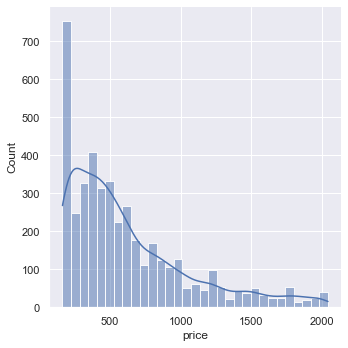

In [250]:
sns.displot(df3['price'],kde = True)

In [251]:
df3.iloc[:,0:20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4385 entries, 0 to 5935
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      4385 non-null   int64  
 1   host_response_rate      4385 non-null   int32  
 2   host_acceptance_rate    3988 non-null   float64
 3   host_is_superhost       4385 non-null   float64
 4   accommodates            4385 non-null   int64  
 5   bedrooms                4385 non-null   float64
 6   beds                    4315 non-null   float64
 7   price                   4385 non-null   float64
 8   minimum_nights          4385 non-null   int64  
 9   number_of_reviews       4385 non-null   int64  
 10  number_of_reviews_ltm   4385 non-null   int64  
 11  number_of_reviews_l30d  4385 non-null   int64  
 12  nc_te                   4385 non-null   int64  
 13  Centra                  4385 non-null   uint8  
 14  Easter                  4385 non-null   

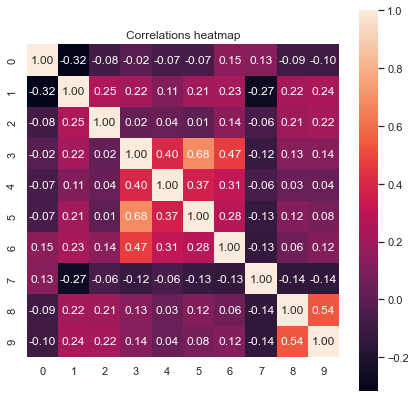

In [252]:
#連續變數
cont = [0,2,3,4,5,6,7,8,9,10]
corrs = np.corrcoef(df3.iloc[:,cont].dropna().values.T)

sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f').set_title('Correlations heatmap')
#print(df3.iloc[:,cont].info)
fig = hm.get_figure()
fig.savefig('correlations.jpg')

## 變異數分析(ANOVA) 檢視連續變數與類別變數的差別
1. 價格與room_type
2. 價格與property_type(Other太雜了 不好分析)
3. 價格與host_location
4. 價格與Superhost
5. number_of_reviews_ltm/number_of_reviews_l30d 與 room_type/property_type

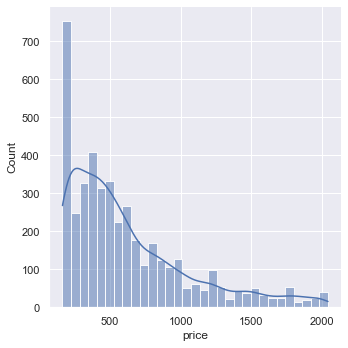

In [253]:
#check price whether is normal dist.
from scipy.stats import normaltest
np.log(df3['price'])
normaltest(np.log(df3['price']))
pic = sns.displot(df3['price'],kde = True)
pic.savefig('price.jpg')

In [254]:
#check price whether is normal dist.

df3['number_of_reviews_ltm'].value_counts()
#sns.displot(df3['number_of_reviews_l30d'])

0      2872
1       430
2       266
3       169
4       107
7        74
5        71
6        59
9        40
8        37
10       34
12       23
11       19
15       18
13       16
14       15
16       13
21       13
20       11
19        8
17        7
24        7
28        7
18        7
22        6
34        6
37        4
32        4
27        3
29        3
25        2
80        2
61        2
86        2
41        2
44        2
23        2
35        2
52        1
90        1
108       1
81        1
42        1
40        1
31        1
94        1
36        1
47        1
49        1
129       1
26        1
33        1
66        1
57        1
38        1
59        1
65        1
64        1
Name: number_of_reviews_ltm, dtype: int64

### 1. price/room_type
結論：Entire home/apt價格顯著較高，其次為Share

Private room in rental unit    2434
Entire rental unit             1425
Entire condo                    367
Entire serviced apartment       228
Shared room in rental unit      222
                               ... 
Shared room in farm stay          1
Religious building                1
Hut                               1
Private room in boat              1
Private room in farm stay         1
Name: property_type, Length: 69, dtype: int64


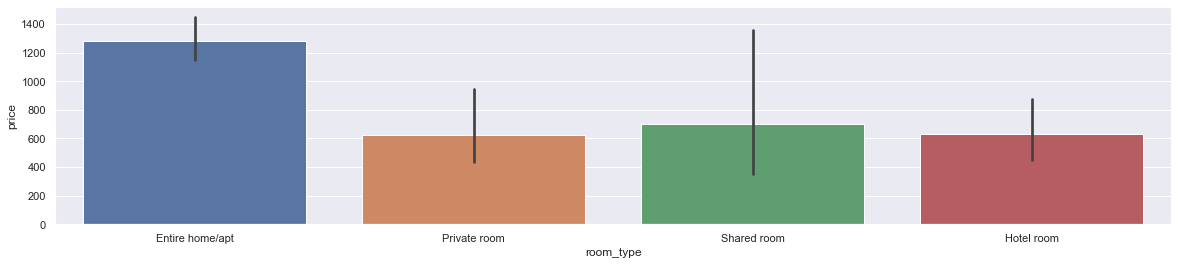

In [255]:
#price
df1.iloc[:,12].isnull().sum()#0
print(df1.iloc[:,12].value_counts())
plt.figure(figsize=(20, 4))
pr = sns.barplot(x = 'room_type', y = 'price', data = df1)
fig = pr.get_figure()
fig.savefig('pr.jpg')

檢定是否有顯著差別

In [256]:
ano11 = df1[df1 ['room_type'] == 'Private room']['price'].tolist()
ano12 = df1[df1 ['room_type'] == 'Entire home/apt']['price'].tolist()
ano13 = df1[df1 ['room_type'] == 'Shared room']['price'].tolist()
ano14 = df1[df1 ['room_type'] == 'Hotel room']['price'].tolist()

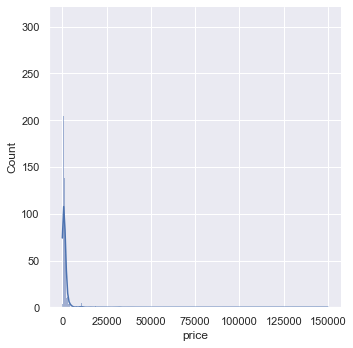

In [257]:
sns.displot(df1[df1 ['room_type'] == 'Entire home/apt']['price'],kde = True)

In [258]:
print(st.shapiro(ano11))
print(st.shapiro(ano12))
print(st.shapiro(ano13))
print(st.shapiro(ano14))


ShapiroResult(statistic=0.016222238540649414, pvalue=0.0)
ShapiroResult(statistic=0.14261311292648315, pvalue=0.0)
ShapiroResult(statistic=0.07791900634765625, pvalue=1.9467750522911022e-35)
ShapiroResult(statistic=0.413688600063324, pvalue=1.9129013033547223e-15)


都不是常態，故使用Kruskal-Wallis檢定(但檢定目標從平均變成中位數了)</P>
https://statistics-using-python.blogspot.com/2019/08/kruskal-wallis-h-testnon-parametric.html

In [260]:
from scipy import stats
stats.kruskal(ano11,ano12,ano13,ano14)
stats.kruskal(ano13,ano14)

KruskalResult(statistic=53.881221226948675, pvalue=2.1298363550646433e-13)

### 2.number_of_reviews_ltm/room_type
結論：Entire home/apt觀看次數顯著較多，其次為Hotel。Private room/Share Room並無顯著差別

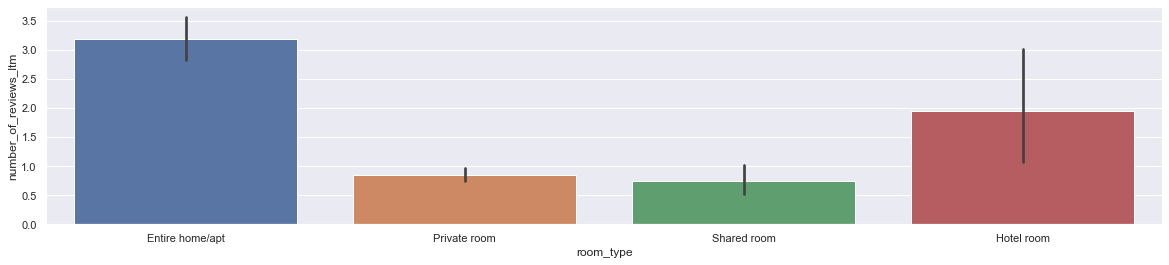

In [261]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
nr = sns.barplot(x = 'room_type', y = 'number_of_reviews_ltm', data = df1)
fig = nr.get_figure()
fig.savefig('nr.jpg')

檢定是否有顯著差別

In [262]:
ano11 = df1[df1 ['room_type'] == 'Private room']['number_of_reviews_ltm'].tolist()
ano12 = df1[df1 ['room_type'] == 'Entire home/apt']['number_of_reviews_ltm'].tolist()
ano13 = df1[df1 ['room_type'] == 'Shared room']['number_of_reviews_ltm'].tolist()
ano14 = df1[df1 ['room_type'] == 'Hotel room']['number_of_reviews_ltm'].tolist()

In [263]:
print(st.shapiro(ano11))
print(st.shapiro(ano12))
print(st.shapiro(ano13))
print(st.shapiro(ano14))

ShapiroResult(statistic=0.3113607168197632, pvalue=0.0)
ShapiroResult(statistic=0.3737102746963501, pvalue=0.0)
ShapiroResult(statistic=0.3904615640640259, pvalue=2.167858718848615e-30)
ShapiroResult(statistic=0.4964470863342285, pvalue=2.554917845484176e-14)


In [264]:
print(stats.kruskal(ano11,ano12,ano13,ano14))
print(stats.kruskal(ano11,ano13))

KruskalResult(statistic=382.2367624832235, pvalue=1.5580439055072154e-82)
KruskalResult(statistic=1.1480521046814904, pvalue=0.2839572838210159)


### 3.價格與host_location
host不在香港價格較高

<AxesSubplot:xlabel='host_location', ylabel='price'>

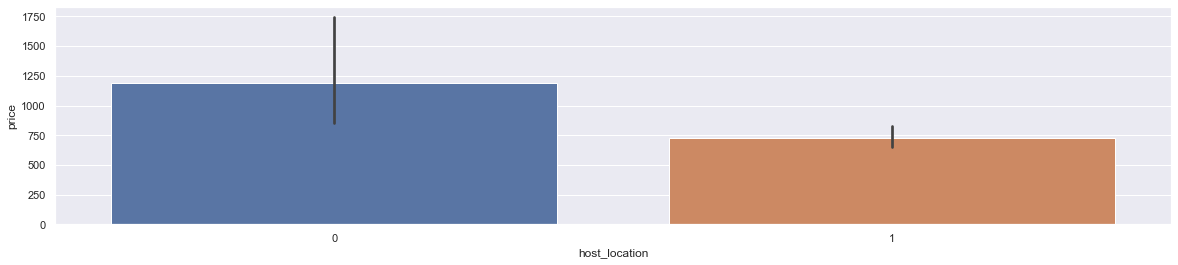

In [265]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
sns.barplot(x = 'host_location', y = 'price', data = df1)


In [266]:
max_thresold = df1['price'].quantile(0.95)
min_thresold = df1['price'].quantile(0.05)
min_thresold
df4 = df1[(df1['price']<max_thresold) & (df1['price']>min_thresold)]

In [267]:
ano11 = df4[df4['host_location'] == 0]['price'].tolist()
ano12 = df4[df4['host_location'] == 1]['price'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
#sns.displot(ano12, kde = True)

ShapiroResult(statistic=0.9016226530075073, pvalue=2.5064689884391373e-30)
ShapiroResult(statistic=0.8310946226119995, pvalue=0.0)


非常態分佈，兩組資料以無母數檢定作分析。

In [268]:
print(stats.kruskal(ano11,ano12))#

KruskalResult(statistic=83.36028023474609, pvalue=6.8382265628801e-20)


### 4.number_of_reviews_ltm與host_location

<AxesSubplot:xlabel='host_location', ylabel='number_of_reviews_ltm'>

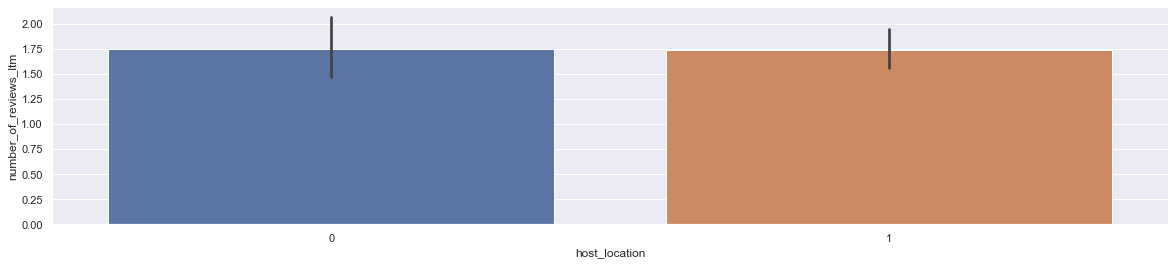

In [269]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
sns.barplot(x = 'host_location', y = 'number_of_reviews_ltm', data = df1)

In [270]:
ano11 = df4[df4['host_location'] == 0]['number_of_reviews_ltm'].tolist()
ano12 = df4[df4['host_location'] == 1]['number_of_reviews_ltm'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
#sns.displot(ano12, kde = True)
print(stats.kruskal(ano11,ano12))#host不在香港還比較好

ShapiroResult(statistic=0.2971993684768677, pvalue=0.0)
ShapiroResult(statistic=0.35550278425216675, pvalue=0.0)
KruskalResult(statistic=20.750886761760803, pvalue=5.230735196872186e-06)


0
0.0


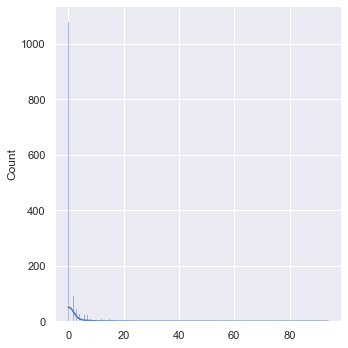

In [271]:
print(statistics.median(ano11))
print(statistics.median(ano12))
sns.displot(ano11,kde = True)

### 5.superhost 與 price
結論：Superhost的價格比較高

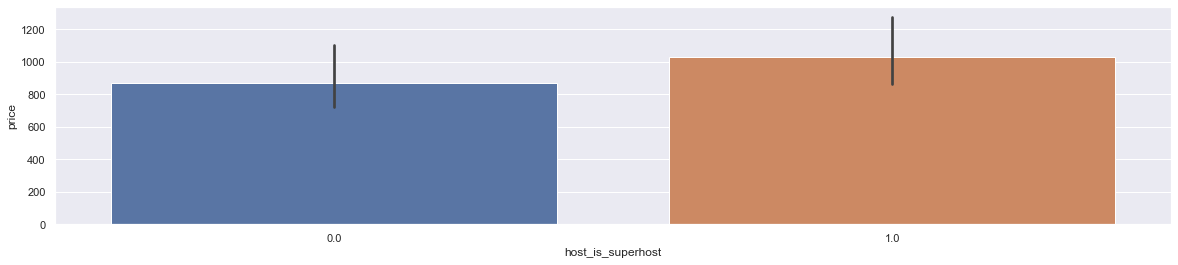

In [272]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
ps = sns.barplot(x = 'host_is_superhost', y = 'price', data = df1)
fig = ps.get_figure()
fig.savefig('ps.jpg')

In [273]:
ano11 = df4[df4['host_is_superhost'] == 0]['price'].tolist()
ano12 = df4[df4['host_is_superhost'] == 1]['price'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
#sns.displot(ano12, kde = True)
print(stats.kruskal(ano11,ano12))#host不在香港還比較好

ShapiroResult(statistic=0.8536533713340759, pvalue=0.0)
ShapiroResult(statistic=0.8735575079917908, pvalue=5.168869254518802e-18)
KruskalResult(statistic=81.16175469036499, pvalue=2.0797822704173329e-19)


### 6.superhost 與 number_of_reviews_ltm
結論：Superhost的曝光度比較高

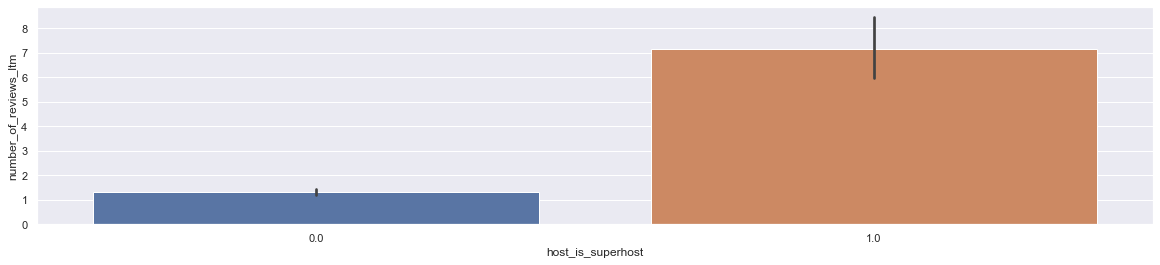

In [274]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
ns = sns.barplot(x = 'host_is_superhost', y = 'number_of_reviews_ltm', data = df1)
fig = ns.get_figure()
fig.savefig('ns.jpg')

In [275]:
ano11 = df4[df4['host_is_superhost'] == 0]['number_of_reviews_ltm'].tolist()
ano12 = df4[df4['host_is_superhost'] == 1]['number_of_reviews_ltm'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
#sns.displot(ano12, kde = True)
print(stats.kruskal(ano11,ano12))#host不在香港還比較好

ShapiroResult(statistic=0.3262788653373718, pvalue=0.0)
ShapiroResult(statistic=0.5122596025466919, pvalue=2.2073330063985218e-32)
KruskalResult(statistic=297.22799236021245, pvalue=1.3234504139133773e-66)


### 7.price/neighbourhood_cleansed
地點與價格有顯著影響

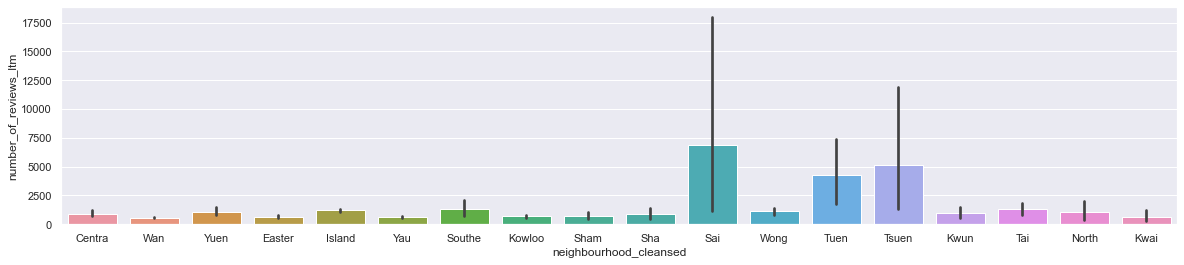

In [276]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
sns.barplot(x = 'neighbourhood_cleansed', y = 'price', data = df1)
ncp = sns.barplot(x = 'neighbourhood_cleansed', y = 'number_of_reviews_ltm', data = df1)
fig = ncp.get_figure()
fig.savefig('ncp.jpg')

In [277]:
df1['neighbourhood_cleansed'].value_counts()

Yau       2114
Wan       1278
Centra    1094
Island     324
Kowloo     245
Easter     243
Sham       163
Southe     139
Sai         95
Yuen        52
Sha         42
Tuen        36
Tai         29
Kwun        28
Tsuen       21
Wong        16
North       13
Kwai         4
Name: neighbourhood_cleansed, dtype: int64

In [280]:
ano11 = df1[df1['neighbourhood_cleansed'] == 'Yau']['price'].tolist()
ano12 = df1[df1['neighbourhood_cleansed'] == 'Wan']['price'].tolist()
ano13 = df1[df1['neighbourhood_cleansed'] == 'Central']['price'].tolist()
ano14 = df1[df1['neighbourhood_cleansed'] == 'Islands']['price'].tolist()
ano15 = df1[df1['neighbourhood_cleansed'] == 'Kowloon']['price'].tolist()
ano16 = df1[df1['neighbourhood_cleansed'] == 'Eastern']['price'].tolist()
ano17 = df1[df1['neighbourhood_cleansed'] == 'Sham']['price'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
print(st.shapiro(ano13))
print(st.shapiro(ano14))
print(st.shapiro(ano15))
print(st.shapiro(ano16))
print(st.shapiro(ano17))
#sns.displot(ano12, kde = True)
print(stats.kruskal(ano11,ano12,ano13,ano14,ano15,ano16,ano17))#host不在香港還比較好

ShapiroResult(statistic=0.13817691802978516, pvalue=0.0)
ShapiroResult(statistic=0.5363280773162842, pvalue=0.0)


ValueError: Data must be at least length 3.

### 8.num.../neighbourhood_cleansed


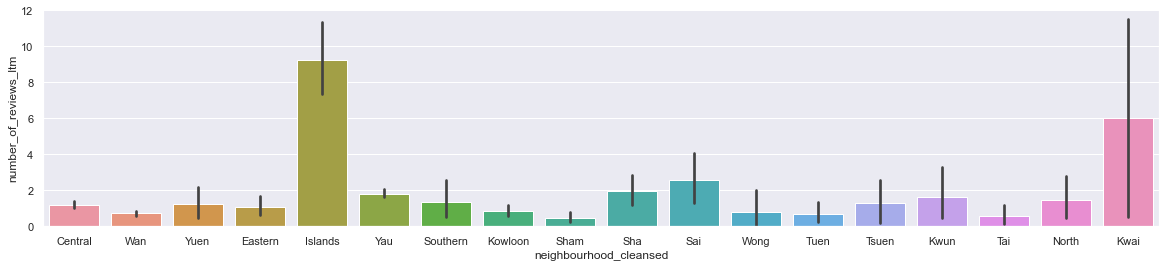

In [ ]:
#number_of_reviews_ltm
plt.figure(figsize=(20, 4))
ncn = sns.barplot(x = 'neighbourhood_cleansed', y = 'number_of_reviews_ltm', data = df1)
fig = ncn.get_figure()
fig.savefig('ncn.jpg')

In [ ]:
ano11 = df1[df1['neighbourhood_cleansed'] == 'Yau']['number_of_reviews_ltm'].tolist()
ano12 = df1[df1['neighbourhood_cleansed'] == 'Wan']['number_of_reviews_ltm'].tolist()
ano13 = df1[df1['neighbourhood_cleansed'] == 'Central']['number_of_reviews_ltm'].tolist()
ano14 = df1[df1['neighbourhood_cleansed'] == 'Islands']['number_of_reviews_ltm'].tolist()
ano15 = df1[df1['neighbourhood_cleansed'] == 'Kowloon']['number_of_reviews_ltm'].tolist()
ano16 = df1[df1['neighbourhood_cleansed'] == 'Eastern']['number_of_reviews_ltm'].tolist()
ano17 = df1[df1['neighbourhood_cleansed'] == 'Sham']['number_of_reviews_ltm'].tolist()
print(st.shapiro(ano11))
print(st.shapiro(ano12))
print(st.shapiro(ano13))
print(st.shapiro(ano14))
print(st.shapiro(ano15))
print(st.shapiro(ano16))
print(st.shapiro(ano17))
#sns.displot(ano12, kde = True)
print(stats.kruskal(ano11,ano12,ano13,ano14,ano15,ano16,ano17))#host不在香港還比較好

ShapiroResult(statistic=0.13817691802978516, pvalue=0.0)
ShapiroResult(statistic=0.5363280773162842, pvalue=0.0)
ShapiroResult(statistic=0.07555294036865234, pvalue=0.0)
ShapiroResult(statistic=0.5181962251663208, pvalue=8.544149864443354e-29)
ShapiroResult(statistic=0.5168693661689758, pvalue=1.9785934356031755e-25)
ShapiroResult(statistic=0.38487839698791504, pvalue=6.048688731726786e-28)
ShapiroResult(statistic=0.16624969244003296, pvalue=1.865923359923974e-26)
KruskalResult(statistic=374.8949620206051, pvalue=6.949543172827982e-78)


### Regression amenities
PRICE

In [ ]:
df1.iloc[:,34:].head(2)

,amenities_ Wifi,amenities_ Air conditioning,amenities_ Essentials,amenities_ Kitchen,amenities_ Hangers,amenities_ Hair dryer,amenities_ Hot water,amenities_ Shampoo,amenities_ TV,amenities_ Iron,...,amenities_ Microwave,amenities_ Private entrance,amenities_ Lock on bedroom door,amenities_ Self check-in,amenities_ Heating,amenities_ First aid kit,amenities_ Extra pillows and blankets,amenities_ Hot water kettle,amenities_ Shower gel,amenities_ Luggage dropoff allowed
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import statsmodels.api as sm
X = df1.iloc[:,34:]
Y = df1['price']

model = sm.OLS(Y,X)
result=model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.027
Method:                 Least Squares   F-statistic:                              6.396
Date:                Fri, 26 May 2023   Prob (F-statistic):                    4.90e-25
Time:                        22:04:00   Log-Likelihood:                         -61022.
No. Observations:                5936   AIC:                                  1.221e+05
Df Residuals:                    5906   BIC:                                  1.223e+05
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

number_of_reviews_ltm

In [ ]:
#import statsmodels.api as sm
X = df1.iloc[:,34:]
Y = df1['number_of_reviews_ltm']

model = sm.OLS(Y,X)
result=model.fit()
print(result.summary())

                                  OLS Regression Results                                  
Dep. Variable:     number_of_reviews_ltm   R-squared (uncentered):                   0.196
Model:                               OLS   Adj. R-squared (uncentered):              0.192
Method:                    Least Squares   F-statistic:                              47.99
Date:                   Fri, 26 May 2023   Prob (F-statistic):                   1.01e-252
Time:                           23:13:08   Log-Likelihood:                         -18811.
No. Observations:                   5936   AIC:                                  3.768e+04
Df Residuals:                       5906   BIC:                                  3.788e+04
Df Model:                             30                                                  
Covariance Type:               nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.

# 三、建立預測模型(較無意義 放棄)

## 資料切割

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error #metrics
#Import machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#prepare train and test datasets for modelling
TEST_SIZE = 0.25
RAND_STATE = 42

X = df2.drop(columns = 'price')
y = df2[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)
y_test.head(3)

,price
556,180.0
1909,417.0
5660,345.0


In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
r2_score(y_test,y_pred)

-0.3055543807410901

## 隨機森林

In [ ]:
#train RF regressor model
forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=RAND_STATE, 
                               n_jobs=-1)
forest.fit(X_train, y_train.squeeze())

#calculate scores for the model
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print('Random Forest MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_preds),
        mean_squared_error(y_test, y_test_preds)))
print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Random Forest MSE train: 13852255.608, test: 23233107.451
Random Forest R^2 train: 0.796, test: -7.836
